# <font color = 'red'> visualizing word frequencies with bar charts and word clouds 

In [1]:

from pathlib import Path
from textblob import TextBlob

blob = TextBlob(Path('dracula.txt').read_text())

from nltk.corpus import stopwords
stopwords = stopwords.words('english')



In [2]:
items = blob.word_counts.items()
print(type(items))

#getting rid of the stop words
items =[item for item in items if item [0] not in stopwords]

# itemgetter getting second element from the tuple which is the count 
from operator import itemgetter
sorted_items = sorted(items,key =itemgetter(1),reverse = True)

# getting top 20 words 
top20 = sorted_items[1:21]
top20

<class 'dict_items'>


[('could', 508),
 ('one', 504),
 ('us', 462),
 ('would', 447),
 ('must', 440),
 ('shall', 427),
 ('may', 417),
 ('know', 396),
 ('see', 395),
 ('time', 377),
 ('come', 339),
 ('van', 323),
 ('helsing', 320),
 ('came', 309),
 ('went', 299),
 ('lucy', 291),
 ('go', 284),
 ('like', 280),
 ('back', 260),
 ('man', 244)]

In [3]:
import pandas as pd 
df = pd.DataFrame(top20,columns = ['word','count'])
df

,word,count
0,could,508
1,one,504
2,us,462
3,would,447
4,must,440
5,shall,427
6,may,417
7,know,396
8,see,395
9,time,377


<Figure size 432x288 with 0 Axes>

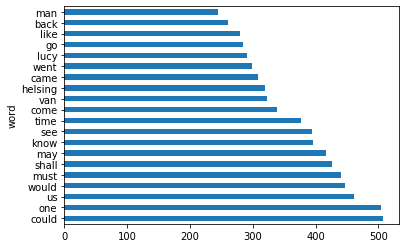

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.gcf().tight_layout()
axes = df.plot.barh(x ='word',y ='count',legend = False)

# WORD CLOUD

In [5]:
import imageio
mask_image = imageio.imread('bat.png')


text = Path('dracula.txt').read_text()



In [6]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000,height =1000,
                     colormap = 'prism',mask = mask_image,background_color ='white')

In [7]:
wordcloud = wordcloud.generate(text)

In [8]:
wordcloud = wordcloud.to_file('dracula_bat.png')

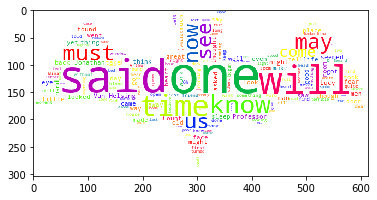

In [9]:
plt.imshow(wordcloud)